In [59]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [57]:
#Load the dataset and view
df = pd.read_csv(r'C:\Users\OLUBISI\Desktop\Data Science Projects\WineQualityProject\Dataset\winequality\winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Check the datatypes and attributes
df.info()

In [ ]:
# Distribution of Different Features of the Dataset
distribution = df.hist(edgecolor = 'black', linewidth = 1.4, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
#Check for missing values
df.isnull().any()

#Count
for i in range(1, 11):
  count_i = len(df.loc[df['quality'] == i])
  print("Count for ", i, ": ", count_i)

In [ ]:
#Split decision variable into bins
bins = (2, 6, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

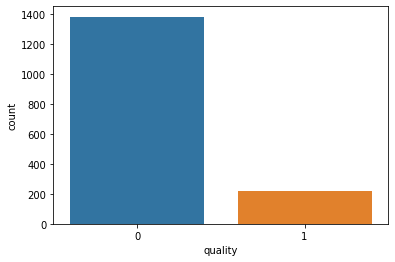

In [8]:
#Change categorical variable into numeric, count and plot

label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()
sns.countplot(df['quality'])

In [10]:
#handle the imbalance problem by downsampling the majority and upsampling minority
from sklearn.utils import resample

#downsampling
df_majority = df[df.quality==0]
df_minority = df[df.quality==1]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=850,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.quality.value_counts()

#Upsampling minority
df_majority = df_downsampled[df_downsampled.quality==0]
df_minority = df_downsampled[df_downsampled.quality==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=850,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.quality.value_counts()

1    850
0    850
Name: quality, dtype: int64

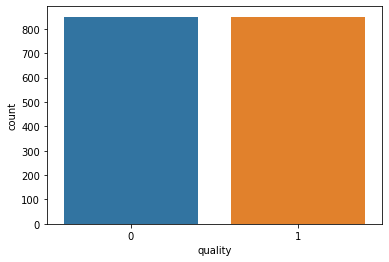

In [11]:
df = df_upsampled
sns.countplot(df['quality'])

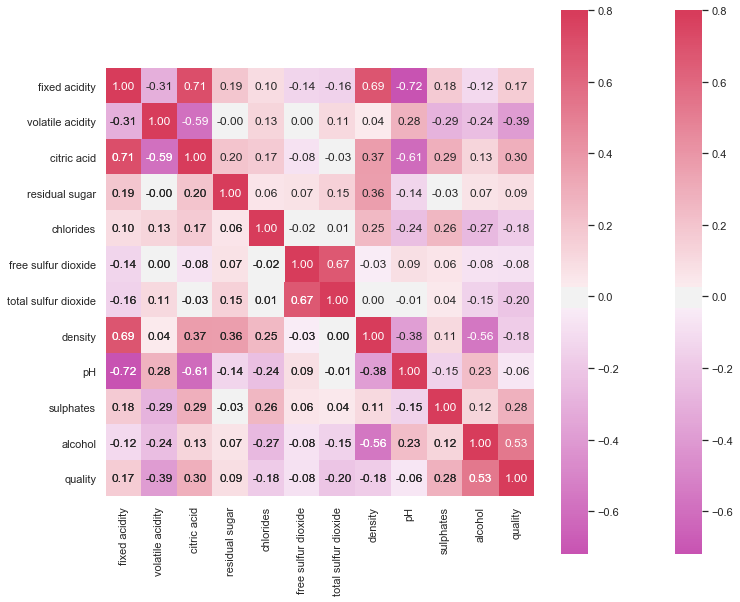

In [24]:
#check for correlation among the attributes

import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))

sns.set(font_scale=1)
#mask = np.triu(np.ones_like(corrmat, dtype=np.bool))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(320, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat,  fmt='.2f', vmax=.8, cmap=cmap, center=0,annot=True, square=True);

# with masking
#sns.heatmap(corrmat,  fmt='.2f', vmax=.8, mask=mask, cmap=cmap, center=0,annot=True, square=True);

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)

#drop columns
df = df.drop(['citric acid', 'pH'], axis=1)
df.info()

In [ ]:
#detect outliers with boxplot
sns.boxplot(data = df, y = 'alcohol')


In [ ]:
#Seperate dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
#Normalize to bring to the same scale for optimized result 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train[0:5]

array([[ 1.70712339, -0.87043765,  0.10198602, -0.06872291,  1.91594072,
         0.79182415,  1.8293706 ,  1.35118744, -0.06295401],
       [-0.16854218, -0.81438806,  0.10198602, -0.38755435, -1.06401098,
        -0.91413799, -0.84840151,  0.38984037,  1.64115863],
       [-0.16854218, -0.81438806, -0.10896605, -0.22813863,  1.33917587,
         0.20249178, -0.57915569,  1.11085068,  1.3003361 ],
       [-0.94087507,  1.67981834,  0.24262073,  0.40952425, -0.67950108,
        -0.57294556,  0.01808051, -0.81184346, -0.14815965],
       [ 0.05212436,  1.39957043,  2.77404549,  0.75112936,  1.53143082,
         2.86999621,  2.41681603,  2.25245032, -1.34103849]])

In [53]:
'''## Apply ML Algorithms **'''

'## Apply ML Algorithms **'

In [29]:
#Neural Networks
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)

C:\Users\OLUBISI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 257.44, 'Predicted label')

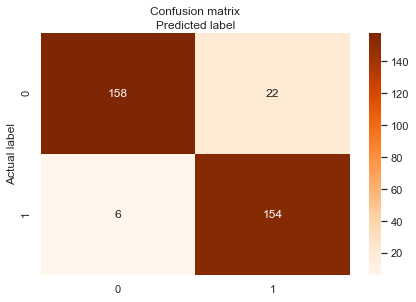

In [49]:
#Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test,pred_mlp)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Oranges" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
# print result
print(classification_report(y_test, pred_mlp))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       180
           1       0.88      0.96      0.92       160

    accuracy                           0.92       340
   macro avg       0.92      0.92      0.92       340
weighted avg       0.92      0.92      0.92       340



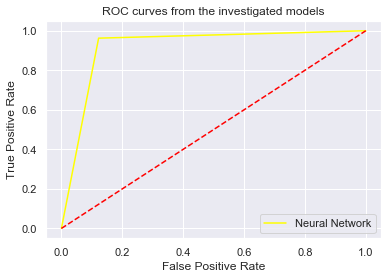

In [38]:
from sklearn.metrics import roc_curve, auc

fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, pred_mlp)
roc_auc_mlp= auc(fpr_mlp, tpr_mlp)
plt.plot(fpr_mlp, tpr_mlp, color='yellow', label='Neural Network' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

In [40]:
#Support Vector Classifier
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)


Text(0.5, 257.44, 'Predicted label')

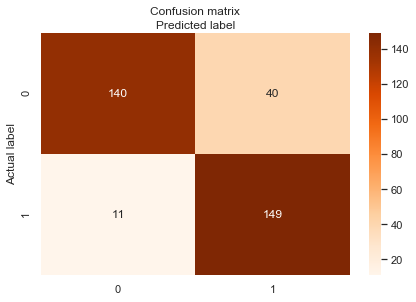

In [50]:
#Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test,pred_svc)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Oranges" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

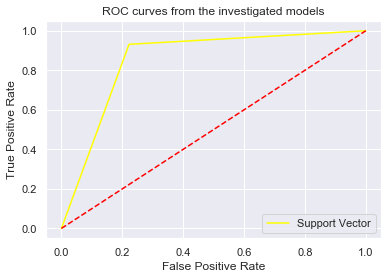

In [43]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, pred_svc)
roc_auc_svc= auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, color='yellow', label='Support Vector' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

MLP: 0.855147 (0.036328)
SVC: 0.836029 (0.034023)


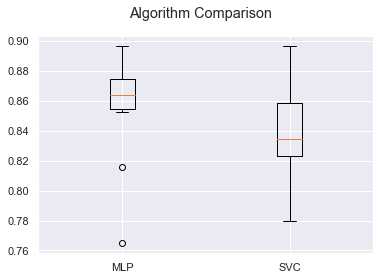

In [60]:
#Improve the models with Cross-validation
from sklearn import model_selection

seed =7
models = []
models.append(('MLP', MLPClassifier(random_state=0)))
models.append(('SVC', SVC(random_state=0)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<Figure size 432x288 with 0 Axes>

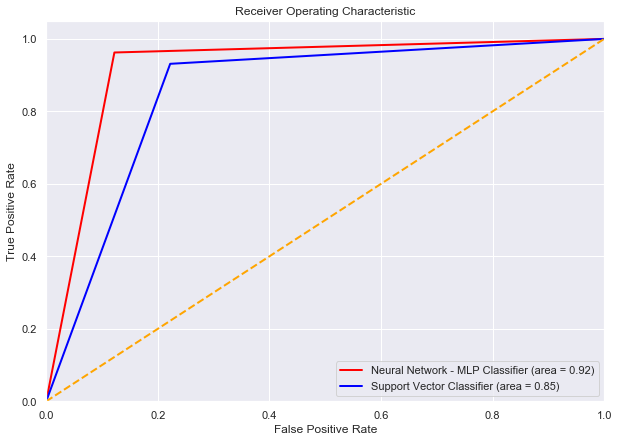

In [63]:
plt.figure()
lw = 2
plt.figure(figsize=(10,7))

plt.plot(fpr_mlp, tpr_mlp, color='red',
         lw=lw, label='Neural Network - MLP Classifier (area = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_svc, tpr_svc, color='blue',
         lw=lw, label='Support Vector Classifier (area = %0.2f)' % roc_auc_svc)


plt.plot([0, 1], [0, 1], color='orange', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()